Credits:

* https://github.com/pmbaumgartner/setfit
* https://moshewasserblat.medium.com/sentence-transformer-fine-tuning-setfit-outperforms-gpt-3-on-few-shot-text-classification-while-d9a3788f0b4e 

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip


In [2]:
train=pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip',sep='\t')
test=pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip',sep='\t')

In [3]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [5]:
train_form = train

In [6]:
train_form['sent_full'] = pd.DataFrame(train_form['Sentiment'].replace(0,'Negative').replace(1,'Somewhat negative').replace(2,'Neutral').replace(3,'Somewhat positive').replace(4,'Positive'))

In [7]:
train_form.head()

,PhraseId,SentenceId,Phrase,Sentiment,sent_full
0,1,1,A series of escapades demonstrating the adage ...,1,Somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,Neutral
2,3,1,A series,2,Neutral
3,4,1,A,2,Neutral
4,5,1,series,2,Neutral


In [8]:
train_pos_neg = train_form[(train_form.sent_full=='Positive') |   (train_form.sent_full=='Negative')].reset_index()

In [9]:
train_pos_neg.shape

(16278, 6)

In [10]:
train_100 = train_pos_neg.sample(100)

In [11]:
test_50 = train_pos_neg.sample(50)

In [12]:
!pip install git+https://github.com/pmbaumgartner/setfit -q


In [13]:
from setfit import SetFitClassifier


In [14]:
# takes a sentence-transformers model
clf = SetFitClassifier("paraphrase-MiniLM-L3-v2")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [15]:
docs = train_100['Phrase'].to_list()
labels = train_100['sent_full'].to_list()

In [16]:
# fine-tunes embeddings + trains logistic regression head
clf.fit(docs, labels) 


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
test_50['predicted'] = clf.predict(test_50['Phrase'].to_list())

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [18]:
test_50

,index,PhraseId,SentenceId,Phrase,Sentiment,sent_full,predicted
2400,27452,27453,1260,"a light , yet engrossing piece .",4,Positive,Positive
9956,97981,97982,5132,boredom,0,Negative,Negative
2978,33281,33282,1559,A sun-drenched masterpiece,4,Positive,Positive
14313,137851,137852,7460,enjoyable comedy,4,Positive,Positive
221,2860,2861,109,masterful,4,Positive,Positive
15367,147724,147725,8038,that this arrogant Richard Pryor wannabe 's ro...,0,Negative,Positive
12370,119567,119568,6392,"Wewannour money back ,",0,Negative,Positive
7266,73220,73221,3739,too long and unfocused,0,Negative,Negative
4761,49794,49795,2441,ranks as the most original in years,4,Positive,Positive
8005,79631,79632,4099,"a movie that is definitely meaningless , vapid...",0,Negative,Negative


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [20]:
cm = confusion_matrix(test_50['sent_full'],test_50['predicted'])

In [21]:
cm

array([[16,  5],
       [ 0, 29]])

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

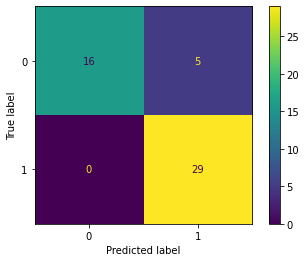

In [23]:
disp.plot()